# 第 3 章 网络数据结构可视化

## 导入库

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import pandas as pd

from modules.tools import graph_info, map_color

# 中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']

## 布局方式

In [2]:
g = nx.read_graphml('../../Data/karate.graphml')
graph_info(g)

Zachary's karate club network with 34 nodes and 78 edges.
Graph type:      undirected weighted 
Node attributes: Faction name label color 
Edge attributes: weight 
Edge list:
[ 0] Mr Hi    -- Actor 2 	[ 1] Mr Hi    -- Actor 3 	[ 2] Mr Hi    -- Actor 4 
[ 3] Mr Hi    -- Actor 5 	[ 4] Mr Hi    -- Actor 6 	[ 5] Mr Hi    -- Actor 7 
[ 6] Mr Hi    -- Actor 8 	[ 7] Mr Hi    -- Actor 9 	[ 8] Mr Hi    -- Actor 11
[ 9] Mr Hi    -- Actor 12	[10] Mr Hi    -- Actor 13	[11] Mr Hi    -- Actor 14
[12] Mr Hi    -- Actor 18	[13] Mr Hi    -- Actor 20	[14] Mr Hi    -- Actor 22
[15] Mr Hi    -- Actor 32	[16] Actor 2  -- Actor 3 	[17] Actor 2  -- Actor 4 
...


`nx.**_layout` 函数返回一个字典，其中包含节点的位置。

这个字典可以传递给 `nx.draw` 函数，以便绘制图形。

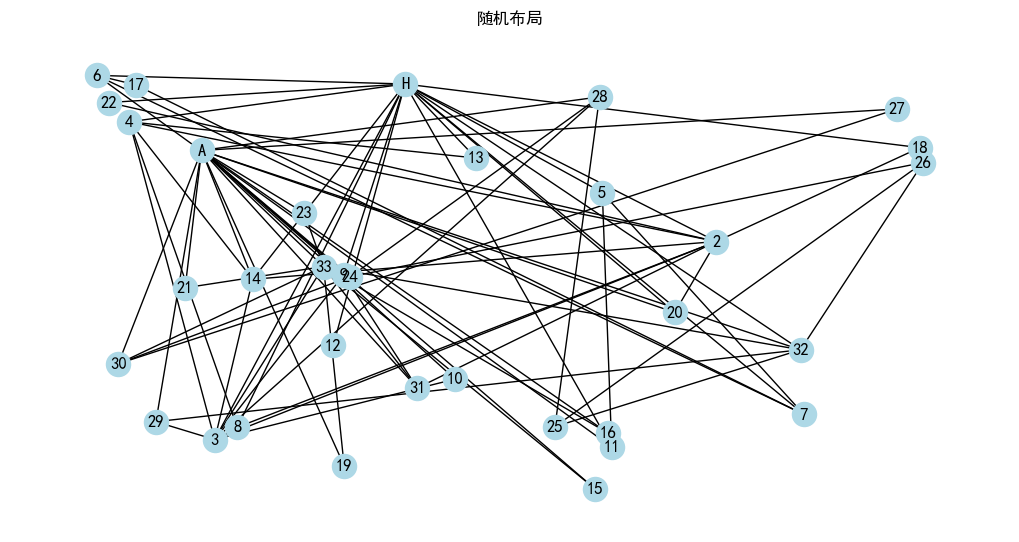

In [3]:
# 随机布局
plt.figure(figsize=(10, 5))
# 绘制图形
nx.draw(
    g, pos=nx.random_layout(g, seed=42),
    labels=nx.get_node_attributes(g, 'label'), 
    node_color='lightblue'
)
# 设置标题
plt.title('随机布局')
plt.show()

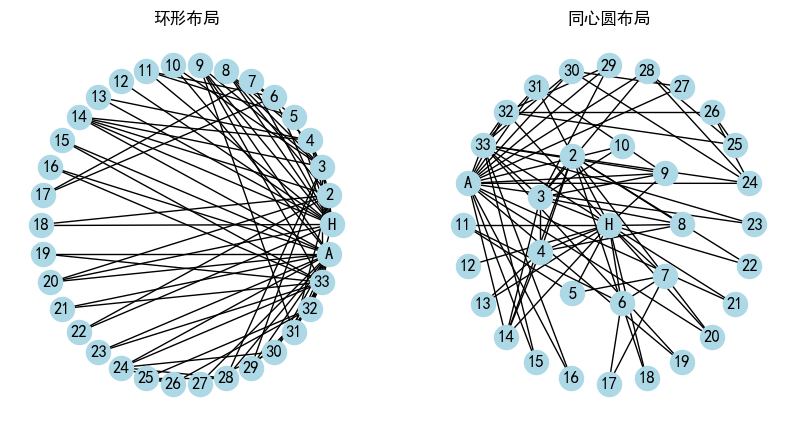

In [4]:
# 环形布局和同心圆布局
# 设置子图1行2列
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# 设置子图标题
ax[0].set_title('环形布局')
# 绘制图形
nx.draw(
    g, 
    pos=nx.circular_layout(g), 
    labels=nx.get_node_attributes(g, 'label'), 
    node_color='lightblue', ax=ax[0]
)

# 设置子图标题
ax[1].set_title('同心圆布局')
# 绘制图形
nx.draw(
    g, 
    pos=nx.shell_layout(g, nlist=[
        list(g.nodes())[:1], 
        list(g.nodes())[1:10], 
        list(g.nodes())[10:]
    ]),
    labels=nx.get_node_attributes(g, 'label'), 
    node_color='lightblue', ax=ax[1]
)

plt.show()

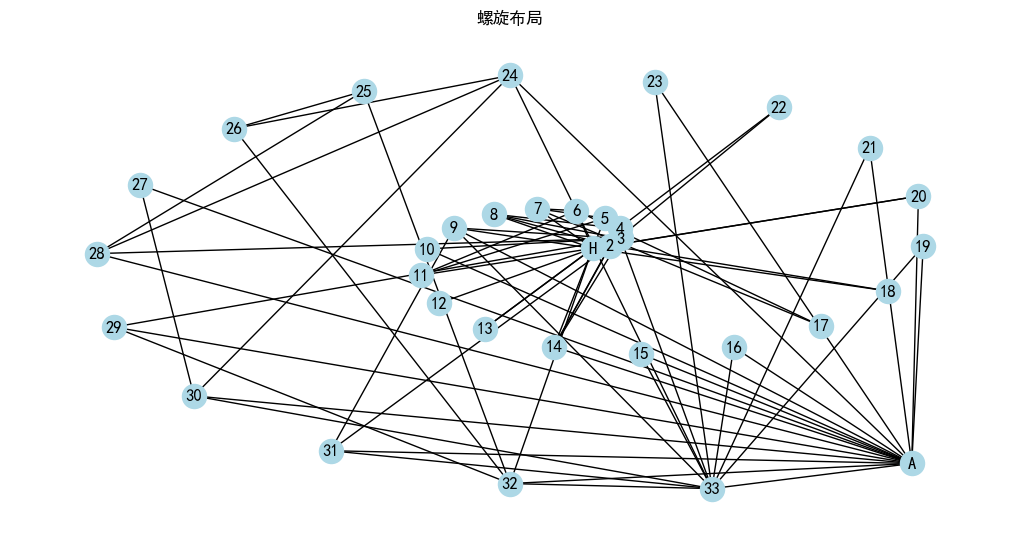

In [5]:
# 螺旋布局
plt.figure(figsize=(10, 5))
# 绘制图形
nx.draw(
    g, 
    pos=nx.spiral_layout(g),
    labels=nx.get_node_attributes(g, 'label'), 
    node_color='lightblue'
)
# 设置标题
plt.title('螺旋布局')
plt.show()

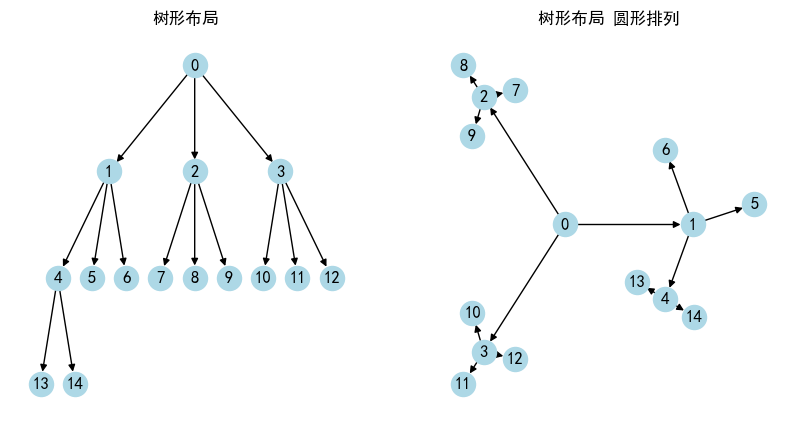

In [6]:
# 树形布局
# 创建一个满3叉树
g_tree = nx.full_rary_tree(3, 15, create_using=nx.DiGraph)

# 设置子图1行2列
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# 设置子图标题
ax[0].set_title('树形布局')
# 绘制图形
nx.draw(
    g_tree,
    pos=nx.nx_agraph.graphviz_layout(g_tree, prog="dot"),
    with_labels=True,
    node_color='lightblue', ax=ax[0]
)

# 设置子图标题
ax[1].set_title('树形布局 圆形排列')
# 绘制图形
nx.draw(
    g_tree,
    pos=nx.nx_agraph.graphviz_layout(g_tree, prog="circo"),
    with_labels=True,
    node_color='lightblue', ax=ax[1]
)

plt.show()

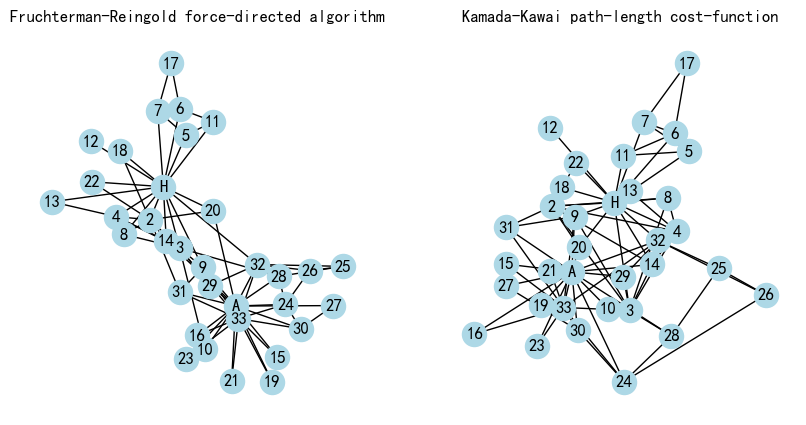

In [7]:
# 使用力导向算法布局
# 设置子图1行2列
fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# 设置子图标题
ax[0].set_title('Fruchterman-Reingold force-directed algorithm')
# 绘制图形
nx.draw(
    g, 
    pos=nx.spring_layout(g, seed=42),
    labels=nx.get_node_attributes(g, 'label'), 
    node_color='lightblue', ax=ax[0]
)

# 设置子图标题
ax[1].set_title('Kamada-Kawai path-length cost-function')
# 绘制图形
nx.draw(
    g, 
    pos=nx.kamada_kawai_layout(g),
    labels=nx.get_node_attributes(g, 'label'), 
    node_color='lightblue', ax=ax[1]
)

plt.show()

## 设置节点和边的可视化参数

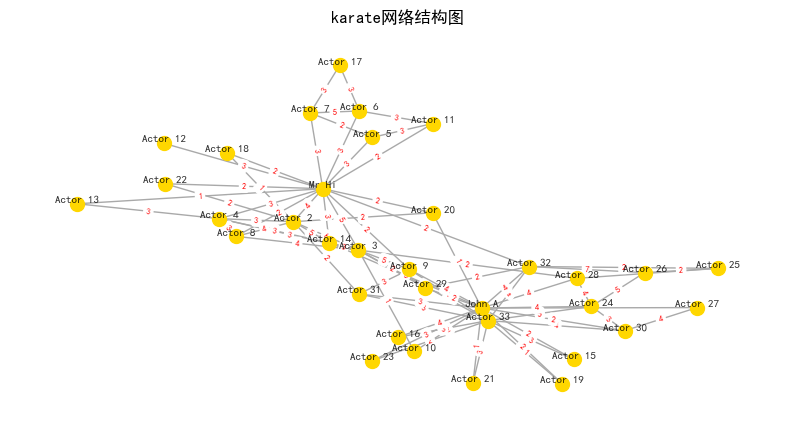

In [8]:
# 导入karate数据
karate = nx.read_graphml('../../Data/karate.graphml')

# 设置画布大小
plt.figure(figsize=(10, 5))
# 设置节点位置，使用力导向算法布局
pos = nx.spring_layout(karate, seed=42)
# 绘制节点
nx.draw_networkx_nodes(
    karate, pos, 
    # 节点大小
    node_size=100,
    # 节点颜色
    node_color='gold',
    # 节点形状
    node_shape='o'
)
# 绘制节点标签
nx.draw_networkx_labels(
    karate, pos, 
    # 节点标签
    labels=nx.get_node_attributes(karate, 'name'),
    # 节点标签字体大小
    font_size=8,
    # 节点标签字体颜色
    font_color='black',
    # 节点标签透明度
    alpha=0.8,
    # 节点标签水平对齐方式
    horizontalalignment='center',
    # 节点标签垂直对齐方式
    verticalalignment='bottom'
)
# 绘制边
nx.draw_networkx_edges(
    karate, pos, 
    # 边箭头
    arrows=False,
    # 边颜色
    edge_color='darkgray',
    # 边宽度
    width=1
)
# 绘制边标签
nx.draw_networkx_edge_labels(
    karate, pos, 
    # 边标签
    # edge_labels=nx.get_edge_attributes(karate, 'weight'),
    edge_labels={(u, v): round(d['weight']) for u, v, d in karate.edges(data=True)},
    # 边标签字体大小
    font_size=6,
    # 边标签字体颜色
    font_color='red',
    # 边标签水平对齐方式
    horizontalalignment='center',
    # 边标签垂直对齐方式
    verticalalignment='center'
)
# 设置标题
plt.title('karate网络结构图')
# 设置坐标轴不可见
plt.axis('off')
plt.show()

## 利用节点和边的可视化参数反映节点和边的属性

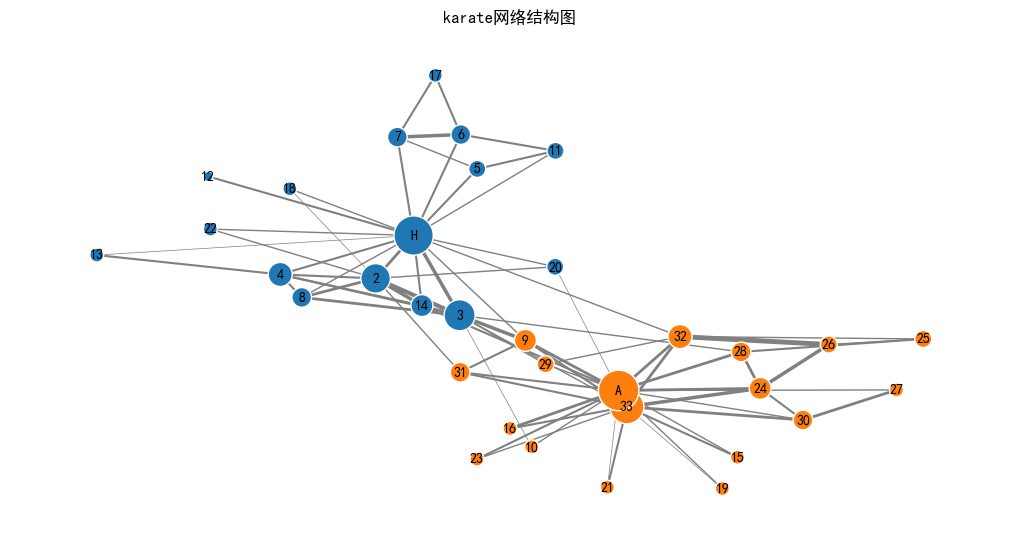

In [9]:
# 导入karate数据
karate = nx.read_graphml('../../Data/karate.graphml')

# 设置画布大小
plt.figure(figsize=(10, 5))
nx.draw(
    karate, 
    # 节点位置
    pos=nx.spring_layout(karate, seed=42),
    # 边宽度 数组类型 - 权重
    # width=list(nx.get_edge_attributes(karate, 'weight').values()),
    width=[d['weight'] * 0.5 for _, _, d in karate.edges(data=True)],
    # 节点标签 字典类型 - 标签
    labels=nx.get_node_attributes(karate, 'label'),
    font_color='black',
    font_size=10,
    # 节点大小 数组类型 - 度
    node_size=[d * 50 for d in dict(karate.degree()).values()],
    # 节点颜色 字典类型 - 阵营
    node_color=map_color(karate, 'Faction'),
    edgecolors='white',
    edge_color='gray'   # ededgecolors 是指节点的边框颜色，而edge_color是指边的颜色，注意区分
)
# 设置标题
plt.title('karate网络结构图')
plt.show()

以上方法直接在`nx.draw`及系列函数中设置参数，通常适用于比较简单的情况。

如果想要有更多的控制，可以在函数外部设置临时变量，然后传递给`nx.draw`函数的参数，但需要注意传入的参数类型，是字典、数组或列表、其他类型。

## 提取核心子图

In [10]:
# 导入原始网络数据
edge_largest = pd.read_csv('../../Data/edge_largest.csv')
edge_largest = nx.from_pandas_edgelist(edge_largest, source='source', target='target')
# 查看网络信息
graph_info(edge_largest)

Graph with 4925 nodes and 10191 edges.
Graph type:      undirected unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[ 0] A10014-0       -- A11813-0      	[ 1] A10014-0       -- A18443-0      
[ 2] A10014-0       -- A25933        	[ 3] A10014-0       -- A26500-1      
[ 4] A10014-0       -- A27463-58     	[ 5] A10014-0       -- A27664-0      
[ 6] A10014-0       -- A29195-1      	[ 7] A10014-0       -- A37213-0      
[ 8] A10014-0       -- A40785-0      	[ 9] A10014-0       -- A41093-0      
[10] A10014-0       -- A41419-0      	[11] A10014-0       -- A49668-2      
...


In [11]:
# 提取核心子图
g_core = nx.k_core(edge_largest, k=6)
# 查看网络信息
graph_info(g_core)

Graph with 198 nodes and 778 edges.
Graph type:      undirected unweighted 
Node attributes: 
Edge attributes: 
Edge list:
[ 0] A27219-10      -- A23520-2      	[ 1] A27219-10      -- A24806-0      
[ 2] A27219-10      -- A3515-0       	[ 3] A27219-10      -- A35694-0      
[ 4] A27219-10      -- A40370-0      	[ 5] A27219-10      -- A4122-0       
[ 6] A27219-10      -- A47461-1      	[ 7] A27219-10      -- A6715-0       
[ 8] A13530-1       -- A16172-0      	[ 9] A13530-1       -- A253-0        
[10] A13530-1       -- A31620-0      	[11] A13530-1       -- A369-0        
...


In [12]:
# 设置节点位置 
# 由于networkx没有对布局算法提供性能优化，所以这里速度较慢
pos = nx.spring_layout(edge_largest, seed=42)

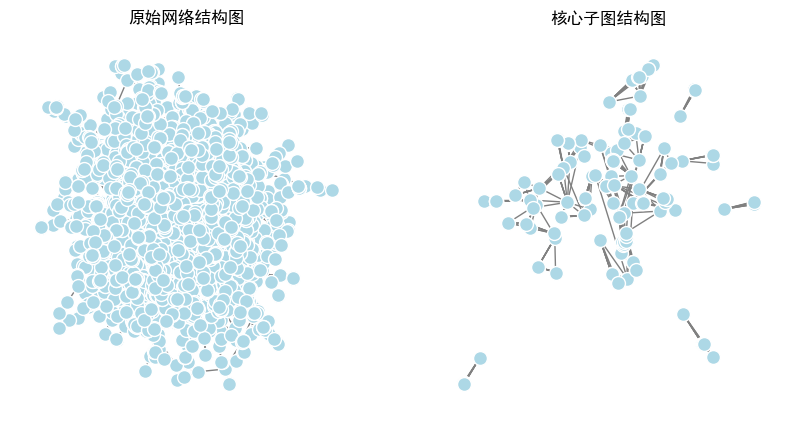

In [13]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].set_title('原始网络结构图')
nx.draw(
    edge_largest, pos,
    node_color='lightblue',
    node_size=100,
    edgecolors='white',
    edge_color='gray',
    ax=ax[0]
)
ax[1].set_title('核心子图结构图')
nx.draw(
    g_core, pos,
    node_color='lightblue',
    node_size=100,
    edgecolors='white',
    edge_color='gray',
    ax=ax[1]
)
plt.show()

## 提取邻域子图

In [14]:
g = edge_largest.copy()

In [15]:
# 提取节点邻域
gn = {}
for n in g.nodes():
    gn[n] = nx.ego_graph(g, n, radius=1)
# 展示前20个节点邻域的子图节点个数
[g.number_of_nodes() for g in list(gn.values())[:20]]

[18, 12, 10, 4, 3, 3, 6, 3, 7, 4, 4, 13, 6, 6, 14, 2, 6, 6, 3, 13]

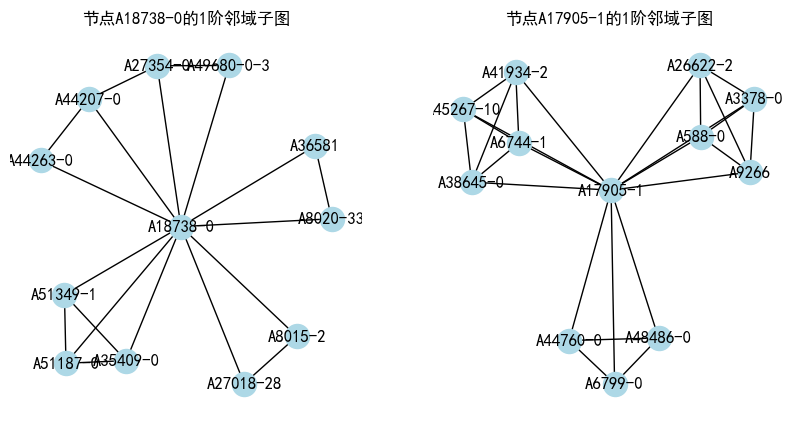

In [16]:
# 设置画布大小
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
# 绘制节点A18738-0的1阶邻域子图
ax[0].set_title('节点A18738-0的1阶邻域子图')
nx.draw(
    gn['A18738-0'], 
    pos=nx.spring_layout(gn['A18738-0'], seed=42),
    with_labels=True,
    node_color='lightblue', ax=ax[0]
)

# 绘制节点A17905-1的1阶邻域子图
ax[1].set_title('节点A17905-1的1阶邻域子图')
nx.draw(
    gn['A17905-1'], 
    pos=nx.spring_layout(gn['A17905-1'], seed=42),
    with_labels=True,
    node_color='lightblue', ax=ax[1]
)

## 网络社区发现

In [17]:
# 使用Louvain算法进行社区发现
com = nx.algorithms.community.louvain.louvain_communities(g_core, seed=42)
# 展示每个社区的大小
[len(c) for c in com]

[7, 7, 7, 7, 7, 8, 7, 7, 8, 7, 7, 7, 7, 7, 8, 17, 15, 27, 7, 7, 10, 7]

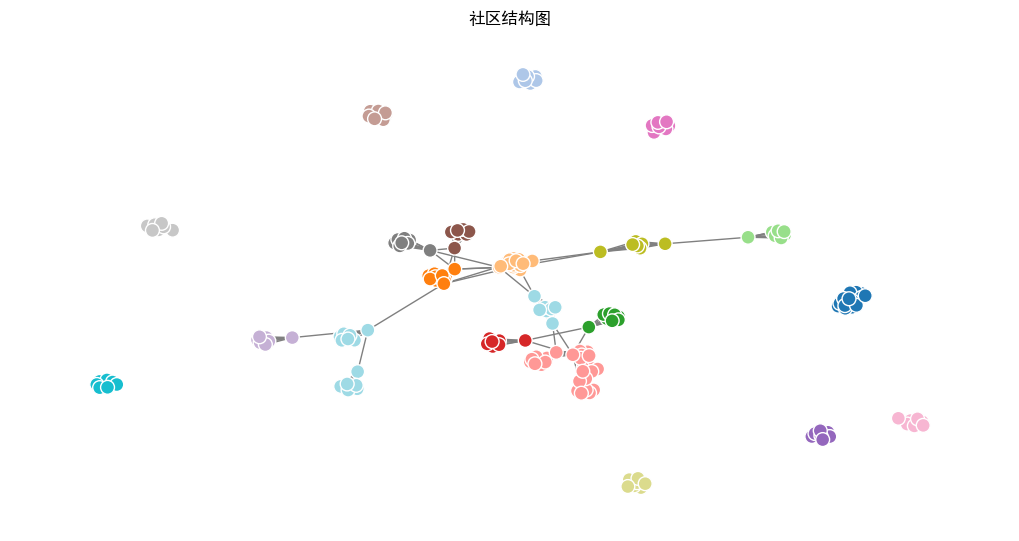

In [18]:
# 设置节点的社区属性
for i, c in enumerate(com):
    for n in c:
        g_core.nodes[n]['community'] = i

# 设置画布大小
plt.figure(figsize=(10, 5))
# 绘制图形
nx.draw(
    g_core,
    pos=nx.spring_layout(g_core, seed=42),
    node_color=map_color(g_core, 'community', cmap='tab20'),
    node_size=100,
    edgecolors='white',
    edge_color='gray'
)
# 设置标题
plt.title('社区结构图')
plt.show()

## 简化网络

In [19]:
# 创建社区图
gc = nx.Graph()
# 添加节点
for u, v in g_core.edges():
    cu = g_core.nodes[u]['community']
    cv = g_core.nodes[v]['community']
    if cu not in gc.nodes():
        gc.add_node(cu, community=cu, size=len(com[cu]))
    if cv not in gc.nodes():
        gc.add_node(cv, community=cv, size=len(com[cv]))
    if cu == cv:
        continue
    if gc.has_edge(cu, cv):
        gc[cu][cv]['weight'] += 1
    else:
        gc.add_edge(cu, cv, weight=1)
# 查看社区图信息
graph_info(gc)

Graph with 22 nodes and 15 edges.
Graph type:      undirected weighted 
Node attributes: community size 
Edge attributes: weight 
Edge list:
[ 0] 20 -- 15	[ 1] 20 -- 9 	[ 2] 20 -- 21	[ 3] 20 -- 8 	[ 4] 15 -- 18
[ 5] 15 -- 8 	[ 6] 15 -- 11	[ 7] 18 -- 17	[ 8] 8  -- 9 	[ 9] 14 -- 17
[10] 14 -- 2 	[11] 1  -- 11	[12] 2  -- 17	[13] 4  -- 21	[14] 21 -- 19


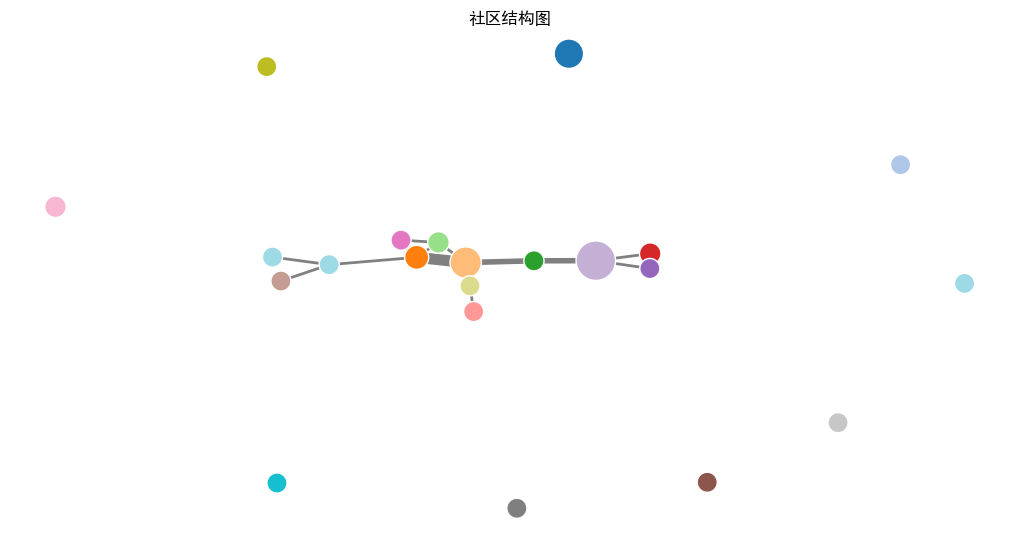

In [20]:
# 设置画布大小
plt.figure(figsize=(10, 5))
# 绘制图形
nx.draw(
    gc,
    pos=nx.spring_layout(gc, seed=42),
    node_color=map_color(gc, 'community', cmap='tab20'),
    node_size=[d['size'] * 30 for d in dict(gc.nodes(data=True)).values()],
    width=[d['weight'] * 2 for _, _, d in gc.edges(data=True)],
    edgecolors='white',
    edge_color='gray'
)
# 设置标题
plt.title('社区结构图')
plt.show()

## 动态交互

networkx库只能绘制简单的网络图，如果想要追求更专业的可视化应该寻求更专业的工具。

另见[Drawing: NetworkX documentation](https://networkx.org/documentation/stable/reference/drawing.html)。